In [1]:
#先輩のを模写してコードリーディング

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.datasets import mnist

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].dtype)

(60000, 28, 28)
(10000, 28, 28)
uint8


In [9]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255


enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)

In [10]:
#Problem 1.

class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer 
        self.W = initializer.W(n_nodes1, n_nodes2)# initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.B = initializer.B(n_nodes2) 
        
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """        
        self.X = X
        A = X@self.W + self.B
        return A
    
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        dZ = dA@self.W.T
        self.dB = np.sum(dA, axis =0)
        self.dW = self.X.T@dA
        self.optimizer.update(self)# 更新
        return dZ

In [11]:
#Problem 2.
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W :(n_nodes1, n_nodes2)
        """
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B : (n_nodes2, )
        """
        B = self.sigma * np.random.randn(n_nodes2)
        return B

In [12]:
#Problem .3
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        
        return

In [13]:
#Ploblem 4.

class Sigmoid:
    
    def forward(self, A):
        self.A = A
        return self.sigmoid(A)
    
    def backward(self, dZ):
        _sig = self.sigmoid(self.A)
        return dZ * (1 - _sig) * _sig
    
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

In [14]:
#Ploblem 4.

class Tanh:
    
    def forward(self, A):
        self.A = A
        return np.tanh(A)
    
    def backward(self, dZ):
        return dZ * (1 - (np.tanh(self.A))**2)

In [15]:
# Problem 4.

class Softmax:
    
    def forward(self, X):
        self.Z = np.exp(X) / np.sum(np.exp(X), axis =1).reshape(-1, 1)
        return self.Z
    
    def backward(self, Y):
        self.loss = self.loss_func(Y)
        return self.Z - Y
    
    def loss_func(self, Y, Z=None):
        """
        y_true : (n_samples, n_output)
        z : (n_samples, n_output)
        """
        if Z is None:
            Z = self.Z
        return (-1) * np.average(np.sum(Y * np.log(Z), axis =1))

In [16]:
#Problem 5.

class ReLU:
    def forward(self, A):
        self.A = A
        return np.clip(A, 0, None)
    
    def backward(self, dZ):
        return dZ * np.clip(np.sign(self.A), 0, None)

In [17]:
#Problem 6.

class XavierInitializer:
    def W(self, n_nodes1, n_nodes2):
        self.sigma = math.sqrt(1 / n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(n_nodes2)
        return B

In [18]:
class HeInitializer():
    def W(self, n_nodes1, n_nodes2):
        self.sigma = math.sqrt(2 / n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(n_nodes2)
        return B

In [19]:
#Problem 7.
class AdaGrad:

    def __init__(self, lr):
        self.lr = lr
        self.HW = 1
        self.HB = 1
        
    def update(self, layer):
        self.HW += layer.dW **2
        self.HB += layer.dB **2
        layer.W -= self.lr * np.sqrt(1 / self.HW) * layer.dW
        layer.B -= self.lr * np.sqrt(1 / self.HB) * layer.dB

In [49]:
#Problem 8.
class ScratchDeepNeuralNetworkClassifier:
    
    def __init__(self, num_epoch = 10, lr = 0.01, batch_size = 20,
                n_features = 784, n_nodes1 = 400, n_nodes2 = 200, n_output = 10,
                verbose = True, activater =Tanh, optimizer = AdaGrad):
        self.num_epoch = num_epoch
        self.lr = lr
        self.verbose = verbose
        
        self.batch_size = batch_size #バッチサイズ
        self.n_features = n_features #特徴量の数
        self.n_nodes1 = n_nodes1 #1層目のノード数
        self.n_nodes2 = n_nodes2 #2層目のノード数
        self.n_output = n_output #出力のクラス数(3層目のノード数)
        
        self.activater = activater
        if activater == Sigmoid or activater == Tanh:
            self.initializer = XavierInitializer
        elif activater == ReLU:
            self.initializer = HeinItializer
        else:
            print('活性化関数が不適切')
        self.optimizer = optimizer
    
    def fit(self, X, y, X_val =None, y_val =None):
        
        self.val_enable = False
        if X_val is not None:
            self.val_enable = True
            
        #optimizer = self.optimizer(self.lr)
        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(), self.optimizer(self.lr))
        self.activation1 = self.activater()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(), self.optimizer(self.lr))
        self.activation2 = self.activater()
        self.FC3 = FC(self.n_nodes2, self.n_output, self.initializer(), self.optimizer(self.lr))
        self.activation3 = Softmax()
        
        self.loss = []
        self.loss_epoch = [self.activation3.loss_func(y, self.forward_propagation(X))]
        for _ in range(self.num_epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size = self.batch_size)
            self.iter = len(get_mini_batch)
            for mini_X, mini_y in get_mini_batch:
                self.forward_propagation(mini_X)
                self.back_propagation(mini_X, mini_y)
                self.loss.append(self.activation3.loss)
            self.loss_epoch.append(self.activation3.loss_func(y, self.forward_propagation(X)))
            
        if self.verbose:
            self.learning_curve()
            print()
            
    def predict(self, X):
        return np.argmax(self.forward_propagation(X), axis =1)
    
    def forward_propagation(self, X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        return Z3
    
    def back_propagation(self, X, y_true):
        dA3 = self.activation3.backward(y_true) #交差エントロピー誤差とソフトマックスを併せている
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dZ0 = self.FC1.backward(dA1) #dZ0は使用しない
        
    def learning_curve(self):
        plt.title('model loss')
        plt.xlabel('num_epoch')
        plt.ylabel('loss')
        plt.plot(np.arange(1, self.num_epoch * self.iter + 1), self.loss, label='train_loss')
        plt.plot(np.arange(0, self.num_epoch + 1) * self.iter, self.loss_epoch, label='epoch_loss')
        if self.val_enable:
            plt.plot(np.arange(1, self.num_epoch + 1), self.val_loss, label = 'val_loss')
        plt.legend()
        plt.show()
        return

In [50]:
# ミニバッチ処理のクラス
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=None):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        
    def __len__(self):
        return self._stop
    
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1] 
    
    def __iter__(self):
        self._counter = 0
        return self
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [51]:
#Problem 9.
def evaluate(y_true, y_pred):
    print('accuracy = ', accuracy_score(y_true, y_pred))
    print('precision = ', precision_score(y_true, y_pred, average = 'macro'))
    print('recall = ', recall_score(y_true, y_pred, average = 'macro'))
    print('f1 = ', f1_score(y_true, y_pred, average= 'macro'))
    print(confusion_matrix(y_true, y_pred))

#### scratch_dnn(num_epoch=5, lr=1e-2, Activater=Tanh, Optimizer=SGD

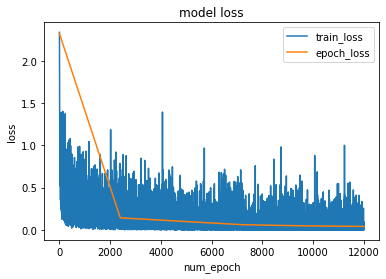

In [52]:
scratch_dnn1 = ScratchDeepNeuralNetworkClassifier(num_epoch=5, lr= 0.01, batch_size=20, 
                                                 n_features=784, n_nodes1 =400, n_nodes2=200, n_output=10,
                                                 verbose = True, activater = Tanh, optimizer=SGD)

scratch_dnn1.fit(X_train_, y_train_)

In [53]:
y_pred1 = scratch_dnn1.predict(X_test)

In [54]:
evaluate(y_test, y_pred1)

accuracy =  0.9696
precision =  0.970366816830221
recall =  0.9693152013855413
f1 =  0.9695854778794166
[[ 963    1    3    2    0    6    2    2    1    0]
 [   0 1129    1    0    0    1    1    1    2    0]
 [   6    6  999    5    3    0    1    7    5    0]
 [   0    2    4  976    0    7    0    4    3   14]
 [   0    0    3    1  927    1    3    1    0   46]
 [   1    1    0    7    0  865    6    1    2    9]
 [   4    3    1    0    2    5  941    0    2    0]
 [   0   12   13    2    1    0    0  974    1   25]
 [   2    2    5   14    2    5    3    3  930    8]
 [   1    2    0    3    5    3    0    3    0  992]]


#### scratch_dnn3(num_epoch=20, lr=1e-2, Activater=Tanh, Optimizer=SGD

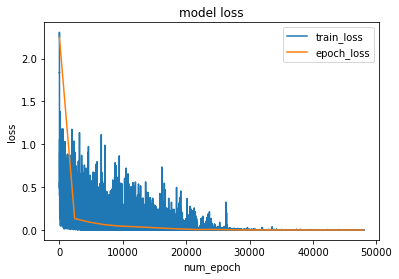

In [55]:
scratch_dnn3 = ScratchDeepNeuralNetworkClassifier(num_epoch=20, lr=0.01, batch_size=20,
                                                 n_features = 784, n_nodes1=400, n_nodes2=200, n_output=10,
                                                 verbose=True, activater=Tanh, optimizer=SGD)
scratch_dnn3.fit(X_train_, y_train_)

In [56]:
y_pred3 = scratch_dnn3.predict(X_test)

In [57]:
evaluate(y_test, y_pred3)

accuracy =  0.9813
precision =  0.9811983704476155
recall =  0.9811396286412597
f1 =  0.9811621433601683
[[ 973    0    1    1    0    3    0    1    0    1]
 [   0 1125    2    2    0    1    2    1    2    0]
 [   5    0 1010    3    2    0    2    5    4    1]
 [   0    0    5  991    0    4    0    3    3    4]
 [   0    0    2    0  962    0    5    4    0    9]
 [   3    0    0    7    2  869    5    1    2    3]
 [   4    2    1    1    2    4  943    0    1    0]
 [   2    4    7    2    1    0    0 1006    2    4]
 [   2    1    5    3    3    3    1    1  953    2]
 [   3    2    0    5    8    2    1    6    1  981]]


#### scratch_dnn9(num_epoch=5, lr=1e-2, Activater=Sigmoid, Optimizer=SGD)

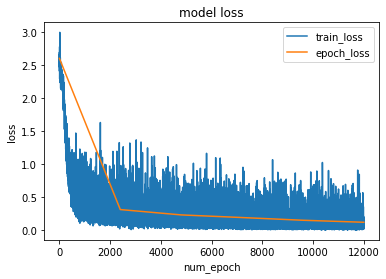

In [64]:
scratch_dnn9 = ScratchDeepNeuralNetworkClassifier(num_epoch=5, lr=0.01, batch_size=20, 
                                                 n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, 
                                                 verbose = True, activater=Sigmoid, optimizer=SGD)
scratch_dnn9.fit(X_train_, y_train_)

In [65]:
y_pred9 = scratch_dnn9.predict(X_test)

In [66]:
evaluate(y_test, y_pred9)

accuracy =  0.9567
precision =  0.9564671692743707
recall =  0.9563845487832603
f1 =  0.9562507168359202
[[ 965    0    1    2    0    6    3    2    1    0]
 [   0 1119    2    2    0    1    4    0    7    0]
 [   6    1  995    8    3    1    9    3    6    0]
 [   1    1    7  978    0    8    0    6    9    0]
 [   1    1    9    1  931    2    9    2    6   20]
 [   6    1    2   12    2  851    8    0    7    3]
 [  12    3    2    2    3   12  917    0    7    0]
 [   1   12   23   12    3    3    0  959    1   14]
 [   4    1    5   13    3    8    7    3  930    0]
 [   6    8    0   15   21   11    1    7   18  922]]


#### scratch_dnn10(num_epoch=20, lr=1e-2, Activater=Sigmoid, Optimizer=SGD

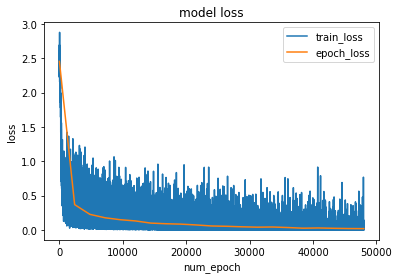

In [61]:
scratch_dnn10= ScratchDeepNeuralNetworkClassifier(num_epoch=20, lr =0.01, batch_size=20, 
                                                 n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, 
                                                 verbose=True, activater=Sigmoid, optimizer=SGD)
scratch_dnn10.fit(X_train_, y_train_)

In [62]:
y_pred10 = scratch_dnn10.predict(X_test)

In [63]:
evaluate(y_test, y_pred10)

accuracy =  0.9767
precision =  0.9767839795948848
recall =  0.9763103597360916
f1 =  0.9764291118591302
[[ 968    0    3    2    2    3    1    1    0    0]
 [   0 1126    4    1    0    1    2    0    1    0]
 [   3    0 1015    3    2    0    1    5    3    0]
 [   0    0    4  997    0    2    0    3    3    1]
 [   1    0    4    0  966    0    5    2    0    4]
 [   7    0    0   15    2  859    4    1    1    3]
 [   5    3    1    1    4    4  939    0    1    0]
 [   1    2    7    4    0    0    0 1010    1    3]
 [   8    0    7   13    4    4    3    3  929    3]
 [   3    4    0    7   22    2    1   10    2  958]]


#### scratch_dnn2(num_epoch=5, lr=1e-2, Activater=Tanh, Optimizer=AdaGrad)

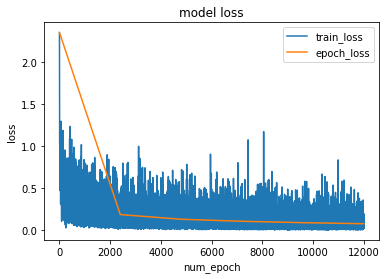

In [67]:
scratch_dnn2 = ScratchDeepNeuralNetworkClassifier(num_epoch=5, lr =0.01, batch_size=20, 
                                                 n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, 
                                                 verbose=True, activater=Tanh, optimizer=AdaGrad)
scratch_dnn2.fit(X_train_, y_train_)

In [68]:
y_pred2 = scratch_dnn2.predict(X_test)

In [69]:
evaluate(y_test, y_pred2)

accuracy =  0.9688
precision =  0.9687028948136494
recall =  0.9684659533898762
f1 =  0.9685461666777954
[[ 970    0    1    1    0    3    2    1    1    1]
 [   0 1124    2    1    0    1    4    2    1    0]
 [   7    1  988    6    5    0    4   10   11    0]
 [   0    0    3  984    0    5    0    9    7    2]
 [   1    0    5    0  943    0    8    4    2   19]
 [   6    1    0   11    2  853    8    1    5    5]
 [   9    3    1    1    2    4  934    0    4    0]
 [   0    5   10    3    2    1    0  989    1   17]
 [   5    3    3    7    3    5    4    6  936    2]
 [   5    5    1    6   14    3    0    8    0  967]]


#### scratch_dnn4(num_epoch=20, lr=1e-2, Activater=Tanh, Optimizer=AdaGrad)

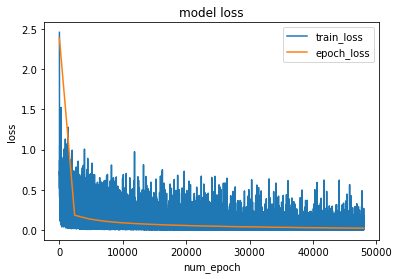

In [70]:
scratch_dnn4 = ScratchDeepNeuralNetworkClassifier(num_epoch=20, lr=0.01, batch_size=20, 
                                                  n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, 
                                                  verbose=True, activater=Tanh, optimizer=AdaGrad)
scratch_dnn4.fit(X_train_, y_train_)

In [71]:
y_pred4 = scratch_dnn4.predict(X_test)

In [72]:
evaluate(y_test, y_pred4)

accuracy =  0.9773
precision =  0.9773078549310945
recall =  0.9770239142354307
f1 =  0.9771399202513619
[[ 972    0    1    1    1    2    0    1    1    1]
 [   0 1123    3    1    0    1    3    1    3    0]
 [   4    0 1009    5    2    0    2    5    5    0]
 [   0    0    4  994    0    1    0    5    4    2]
 [   1    0    3    1  959    0    3    2    1   12]
 [   4    0    0   14    2  860    3    1    4    4]
 [   6    3    2    1    2    5  936    0    3    0]
 [   2    4    8    2    1    0    0  998    2   11]
 [   2    2    4    5    4    4    2    3  946    2]
 [   2    5    0    6    8    2    1    5    4  976]]


#### scratch_dnn7(num_epoch=5, lr=0.1, Activater=Tanh, Optimizer=AdaGrad)

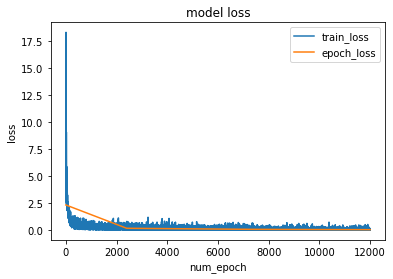

In [73]:
scratch_dnn7 = ScratchDeepNeuralNetworkClassifier(num_epoch=5, lr=0.1, batch_size=20, 
                                                  n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, 
                                                  verbose=True, activater=Tanh, optimizer=AdaGrad)
scratch_dnn7.fit(X_train_, y_train_)

In [74]:
y_pred7 = scratch_dnn7.predict(X_test)

In [75]:
evaluate(y_test, y_pred7)

accuracy =  0.9727
precision =  0.9725036849971318
recall =  0.9725239506893197
f1 =  0.9724462908492957
[[ 962    0    0    2    0    6    5    1    2    2]
 [   0 1124    1    2    0    1    2    1    4    0]
 [   4    3  994   14    3    1    2    6    5    0]
 [   0    0    5  989    0    5    0    4    5    2]
 [   1    0    0    1  959    1    6    1    0   13]
 [   4    0    0    7    2  868    5    0    3    3]
 [   3    2    1    0    7   11  931    0    3    0]
 [   0    6    7   11    1    2    0  987    0   14]
 [   2    0    2   11    3    8    5    1  937    5]
 [   2    3    0    9    8    5    1    3    2  976]]


#### scratch_dnn8(num_epoch=20, lr=0.1, Activater=Tanh, Optimizer=AdaGrad)

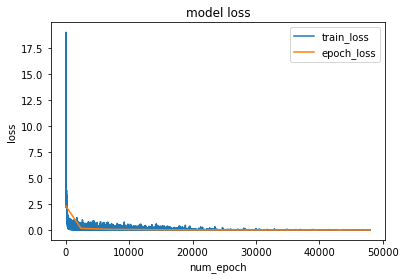

In [76]:
scratch_dnn8 = ScratchDeepNeuralNetworkClassifier(num_epoch=20, lr=0.1, batch_size=20, 
                                                  n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, 
                                                  verbose=True, activater=Tanh, optimizer=AdaGrad)
scratch_dnn8.fit(X_train_, y_train_)

In [77]:
y_pred8 = scratch_dnn8.predict(X_test)

In [78]:
evaluate(y_test, y_pred8)

accuracy =  0.9793
precision =  0.9792358884081175
recall =  0.9790606629644859
f1 =  0.979137405721789
[[ 969    0    1    0    0    2    3    1    2    2]
 [   0 1125    2    2    0    1    2    1    2    0]
 [   6    0 1012    3    1    0    1    7    2    0]
 [   0    0    5  989    0    3    0    5    4    4]
 [   1    0    1    0  958    0    7    4    1   10]
 [   3    0    0   10    2  864    5    1    4    3]
 [   4    3    1    0    4    3  941    1    1    0]
 [   2    6    7    2    1    0    0 1001    1    8]
 [   3    0    2    4    3    3    2    3  952    2]
 [   3    3    0    5    7    3    1    4    1  982]]


#### scratch_dnn5(num_epoch=5, lr=1e-2, Activater=ReLU, Optimizer=SGD)

In [ ]:
scratch_dnn5 = ScratchDeepNeuralNetworkClassifier(num_epoch=5, lr=0.01, batch_size=20, 
                                                  n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, 
                                                  verbose=True, activater=ReLU, optimizer=SGD)
scratch_dnn5.fit(X_train_, y_train_)

In [ ]:
y_pred5 = scratch_dnn5.predict(X_test)

In [ ]:
evaluate(y_test, y_pred5)

#### scratch_dnn11(num_epoch=20, lr=1e-2, Activater=ReLU, Optimizer=SGD)

In [ ]:
scratch_dnn11 = ScratchDeepNeuralNetworkClassifier(num_epoch=20, lr=0.01, batch_size=20, 
                                                  n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, 
                                                  verbose=True, activater=ReLU, optimizer=SGD)
scratch_dnn11.fit(X_train_, y_train_)

In [ ]:
y_pred11 = scratch_dnn11.predict(X_test)

In [ ]:
evaluate(y_test, y_pred11)

#### scratch_dnn6(num_epoch=5, lr=1e-2, Activater=ReLU, Optimizer=AdaGrad)

In [ ]:
scratch_dnn6 = ScratchDeepNeuralNetworkClassifier(num_epoch=5, lr=0.01, batch_size=20, 
                                                  n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, 
                                                  verbose=True, activater=ReLU, optimizer=AdaGrad)
scratch_dnn6.fit(X_train_, y_train_)

In [ ]:
y_pred6 = scratch_dnn6.predict(X_test)

In [ ]:
evaluate(y_test, y_pred6)

#### scratch_dnn12(num_epoch=20, lr=1e-2, Activater=ReLU, Optimizer=AdaGrad)

In [ ]:
scratch_dnn12 = ScratchDeepNeuralNetworkClassifier(num_epoch=20, lr=0.01, batch_size=20, 
                                                  n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, 
                                                  verbose=True, activater=ReLU, optimizer=AdaGrad)
scratch_dnn12.fit(X_train_, y_train_)

In [ ]:
y_pred12 = scratch_dnn12.predict(X_test)

In [ ]:
evaluate(y_test, y_pred12)